In [1]:
!pip list

Package                       Version
----------------------------- ---------------------
absl-py                       1.4.0
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
anyio                         3.6.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
array-record                  0.2.0
arviz                         0.15.1
astropy                       5.2.2
astunparse                    1.6.3
attrs                         23.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
beautifulsoup4                4.11.2
bleach                        6.0.0
blis                          0.7.9
blosc2                        2.0.0
bokeh                         2.4.3
branca                        0.6.0
build                         0.10.0
CacheControl                  0.12.11
ca

# 1: Install package

In [2]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output

print(f"Versi torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 15973, done.
remote: Counting objects: 100% (142/142), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 15973 (delta 84), reused 98 (delta 61), pack-reused 15831
Receiving objects: 100% (15973/15973), 14.58 MiB | 7.02 MiB/s, done.
Resolving deltas: 100% (10958/10958), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.6/599.6 kB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.7 MB/s eta 0:00:00
Versi torch 2.0.1+cu118 (Tesla T

# 2: Image Akuisisi



In [3]:
# from roboflow import Roboflow
# rf = Roboflow(model_format="yolov5", notebook="ultralytics")

In [4]:
# buat folder
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="XOdJFQytuzfuD9o1jrYa")
project = rf.workspace("sari-sil-xiq20").project("emosidetect2")
dataset = project.version(2).download("yolov5")











# rf = Roboflow(api_key="5s6pm49rP45QR1YXLlYL")
# project = rf.workspace("daniel-morantha-yt377").project("ayamdeteksi")
# dataset = project.version(1).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/EmosiDetect2-2 in yolov5pytorch:: 100%|██████████| 7780/7780 [00:02<00:00, 3822.69it/s]


# 3: Latih model YOLOv5

Ket dari argument:
- **img:** define input image size mendefinisikan resolusi gambar input
- **batch:** batch sizenya
- **epochs:** mendefinisikan berapa banyak train yang dilakukan
- **data:** Lokasi dataset sya disini->`dataset.location`
- **weights:** tentukan jalur ke bobot untuk memulai transfer pembelajaran. Di sini kami memilih pos pemeriksaan pretrained COCO umum.
- **cache:** cache gmbr untuk train

In [6]:
!python train.py --img 512 --batch 16 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache --name yolov5s_results

train: weights=yolov5s.pt, cfg=, data=/content/datasets/EmosiDetect2-2/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=512, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-181-g3812a1a Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gam

# Evaluasi Model YOLOV5 menggunakan tensorboard


[here](https://blog.roboflow.com/mean-average-precision/).

In [7]:
%load_ext tensorboard
%tensorboard --logdir runs

<IPython.core.display.Javascript object>

#Deteksi objek


In [8]:
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=/content/datasets/EmosiDetect2-2/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-181-g3812a1a Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/158 /content/datasets/EmosiDetect2-2/test/images/S011_004_00000021_png.rf.58b6ea28a61112c0388e938acfed2f70.jpg: 416x416 1 anger, 12.0ms
image 2/158 /content/datasets/EmosiDetect2-2/test/images/S014_003_00000028_png.rf.2f86373ab41edf2621e8bf47ca8520d7.jpg: 416x416 1 anger, 16.7ms
image 3/158 /content/d

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [ ]:
!ls runs/train/yolov5s_results

In [ ]:
# Image(filename='runs/train/yolov5s_results/val_batch0_pred.jpg', width=500)

In [ ]:
# Image(filename='runs/train/yolov5s_results/confusion_matrix.png', width=500)

In [ ]:
!python val.py --weights runs/train/yolov5s_results/weights/best.pt --data /content/datasets/EmosiDetect2-1/data.yaml --img 416 --iou 0.45 --half

In [ ]:
!ls runs/train/yolov5s_results

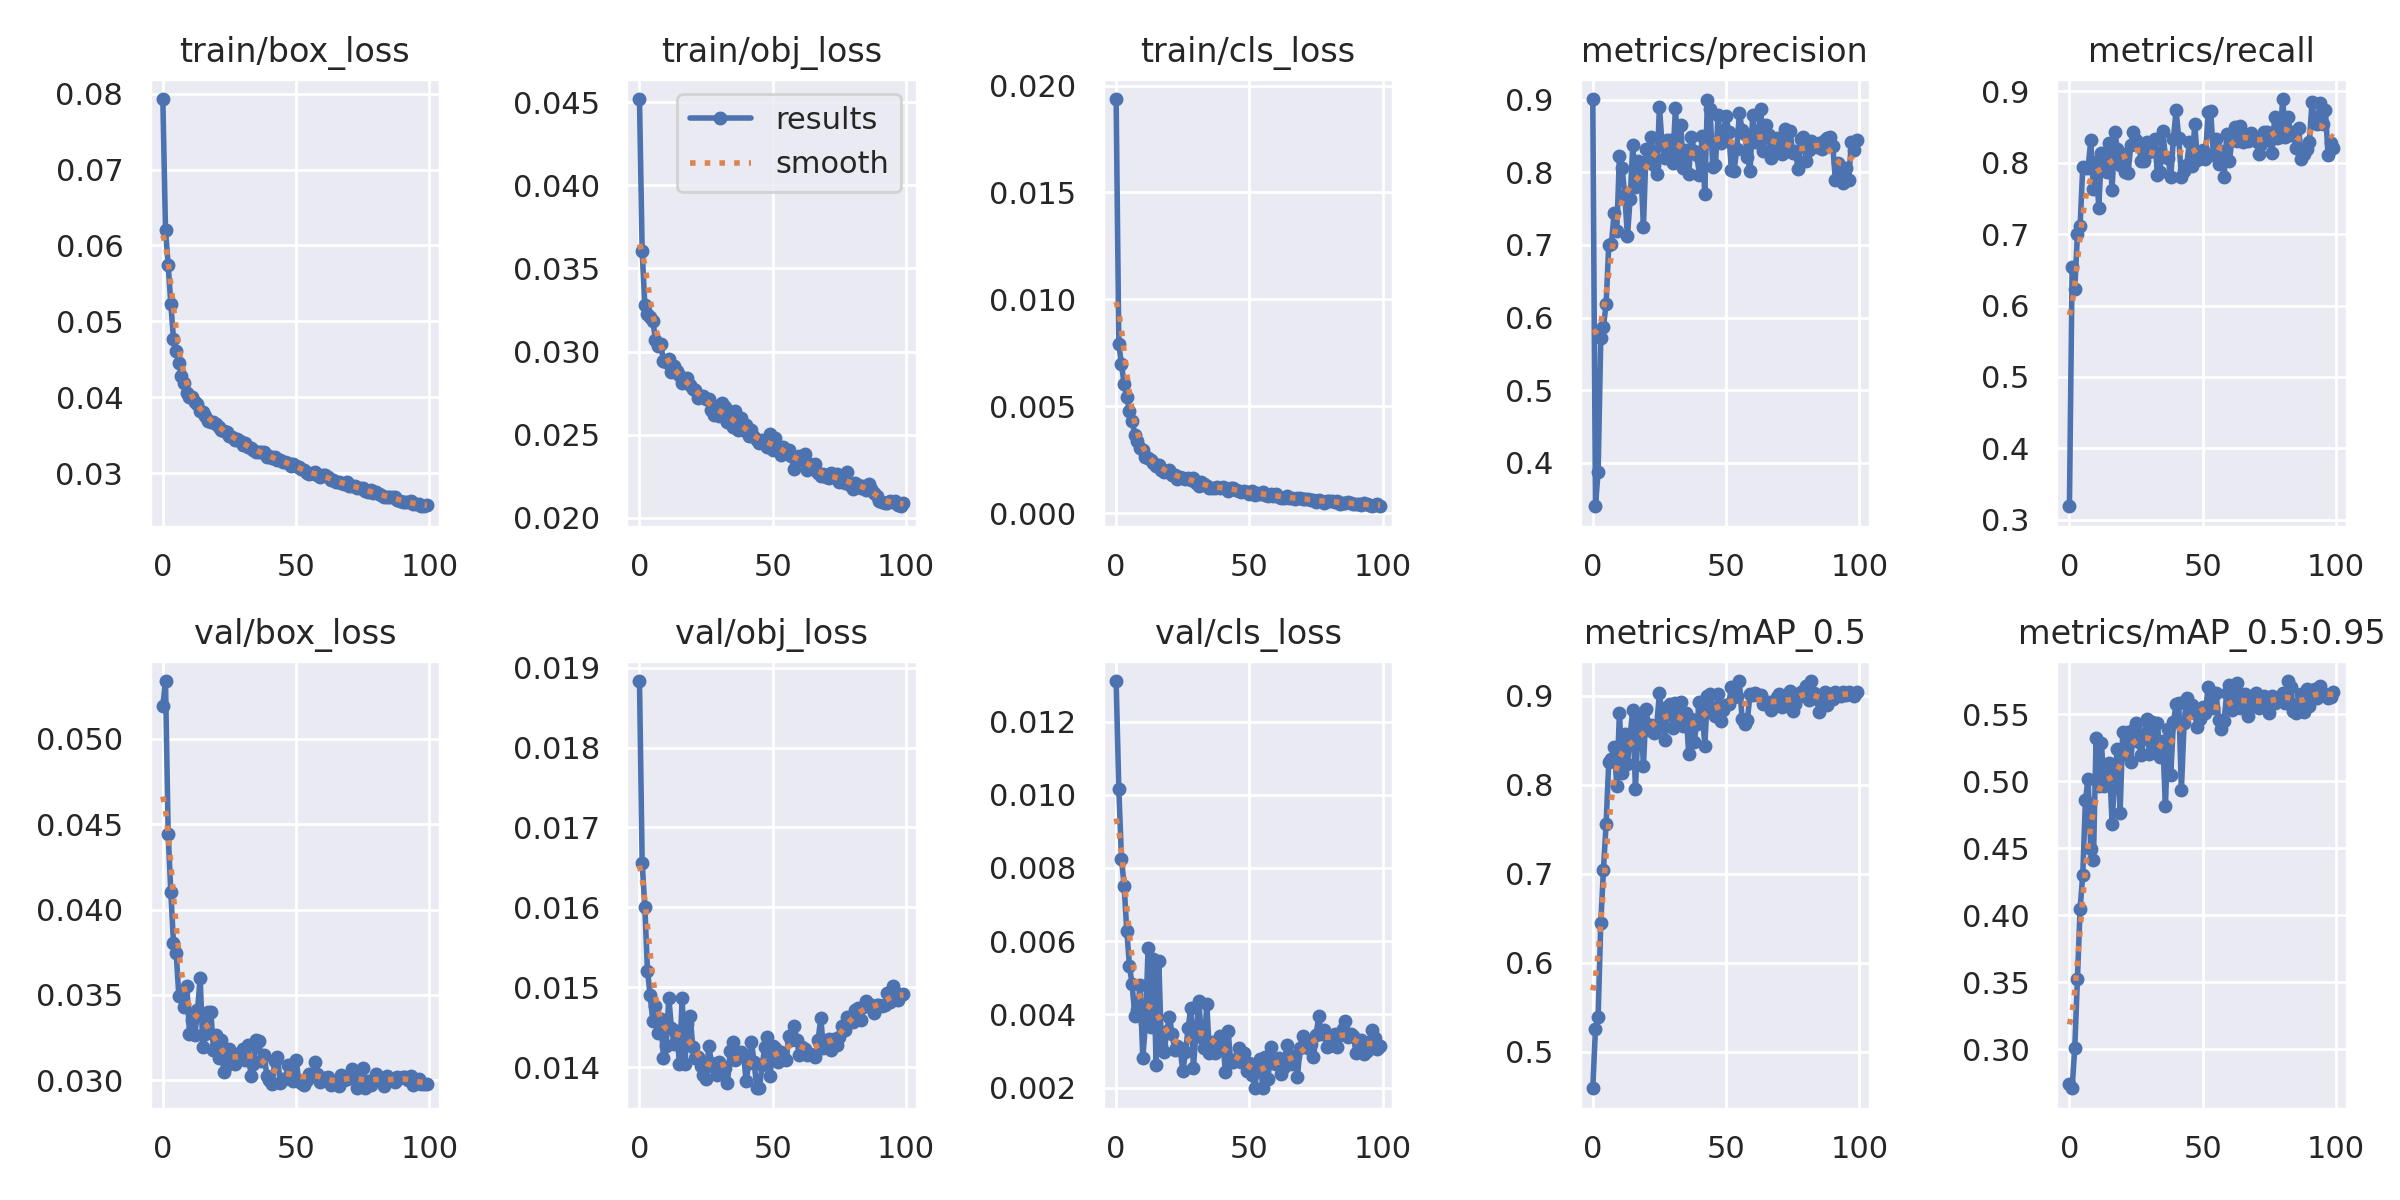

In [24]:
from utils.plots import plot_results
Image(filename='runs/train/yolov5s_results/results.png', width=1000)
# Image(filename='runs/train/yolov5s_results/P_curve.png', width=1000)  # view results.png


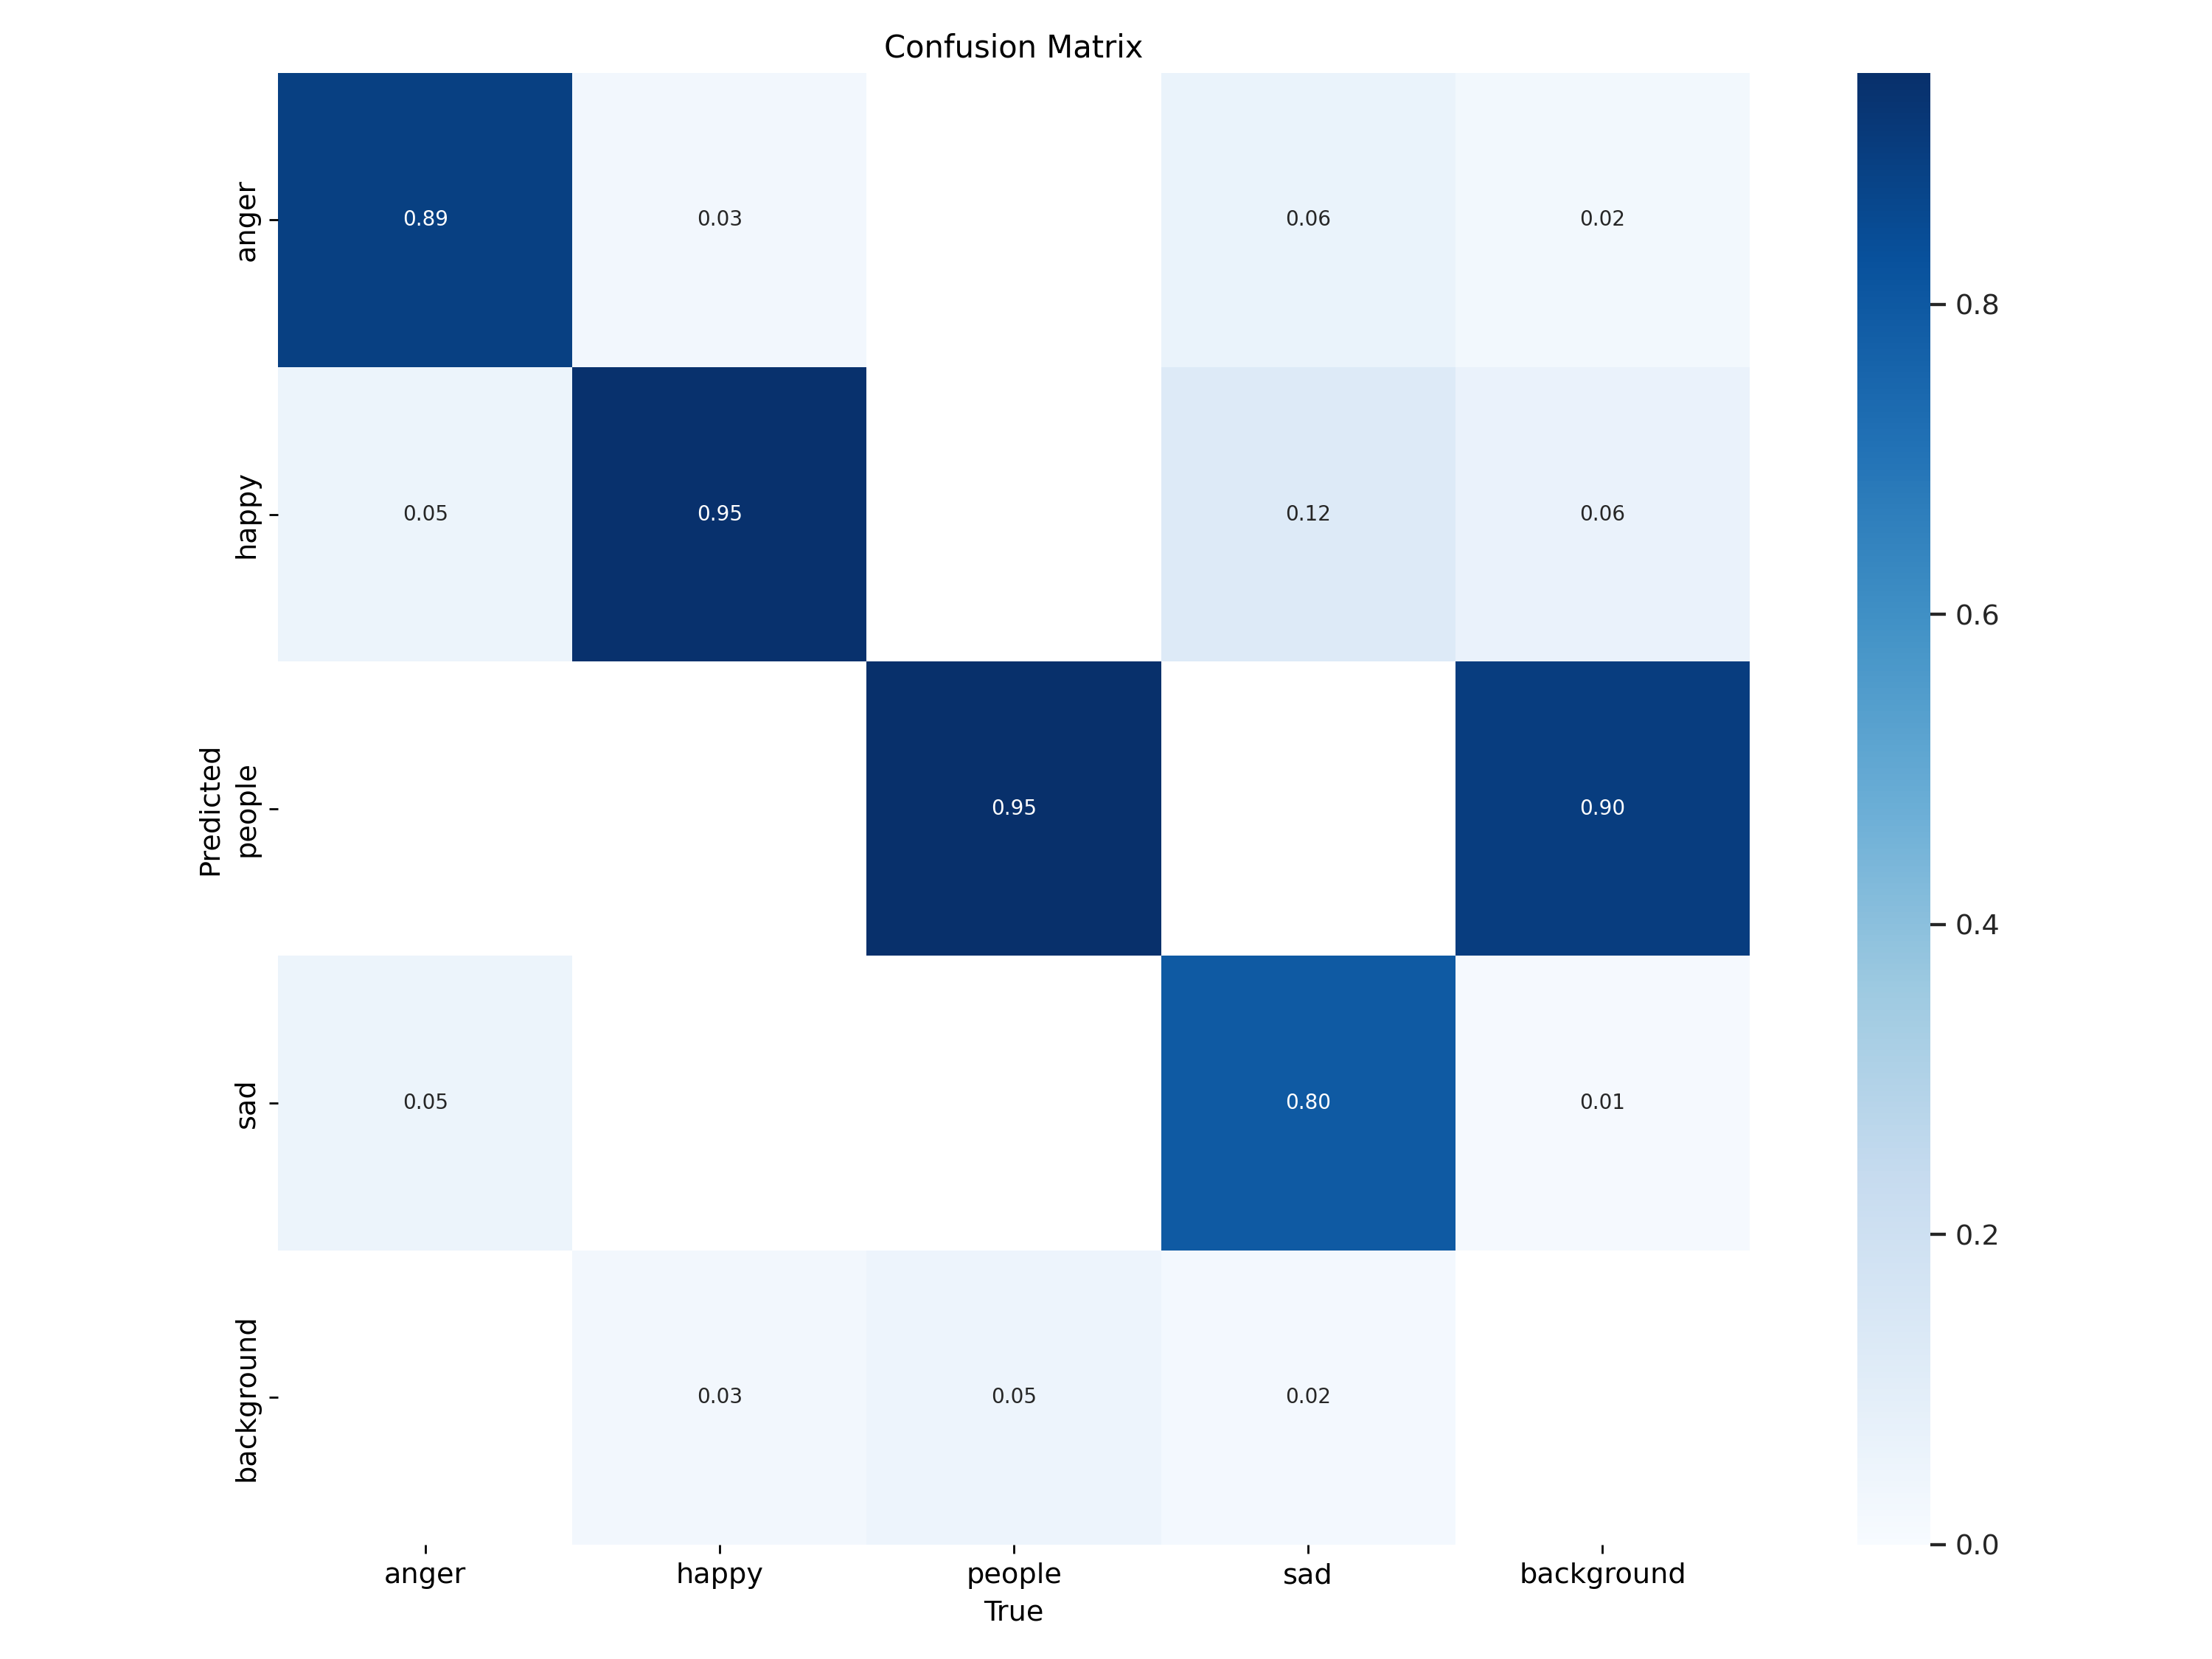

In [25]:
Image(filename='runs/train/yolov5s_results/confusion_matrix.png', width=500)

# Prediksi dengan Recognition objek

In [ ]:
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.1 --source /content/IMG_5116.jpg

In [ ]:
for imageName in glob.glob('runs/detect/exp2/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

# Save Model

In [26]:
#export your model's weights for future use
from google.colab import files
files.download('runs/train/yolov5s_results/weights/best.pt')
# files.download('runs/train/yolov5s_results')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!zip -r /content/DS-danielmrnth-BoundingBox.zip /content/datasets

In [ ]:
!zip -r /content/yolov5.zip /content/yolov5

In [ ]:
from google.colab import files
files.download("/content/yolov5.zip")

In [ ]:
# import torch
# from matplotlib import pyplot as plt
# import numpy as np
# import cv2

# cap = cv2.VideoCapture(0)
# while cap.isOpened():
#     ret, frame = cap.read()

#     # Make detections
#     results = model(frame)

#     cv2.imshow('YOLO', np.squeeze(results.render()))

#     if cv2.waitKey(10) & 0xFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()